In [42]:
import pygame as pg
import numpy as np
import matplotlib.pyplot as plt

In [43]:
modules_init_and_not_init = pg.init()

### pg.init()

- Purpose: Initializes all the imported Pygame modules.

- Explanation:

    - Pygame consists of multiple submodules for various functionalities like graphics, sound, input handling, etc.
    - Calling pg.init() initializes all the modules that are part of Pygame at once (if possible).
    - If a module cannot be initialized, it will not raise an error but will simply not be ready for use.

-Returns:

    - A tuple containing two values:
    - The number of modules that were successfully initialized.
    - The number of modules that failed to initialize.

In [44]:
modules_init_and_not_init

(5, 0)

- 5 - The number of modules that were successfully initialized.
- 0 - The number of modules that failed to initialize.

In [108]:
pg.mixer.init()

### pg.mixer.init()

- Purpose: Initializes the mixer module, which is used for handling and playing sounds and music in Pygame.

- Explanation:

    - The mixer module allows you to play sound effects and music files.
    - pg.mixer.init() sets up the sound system (audio device) with default or user-defined parameters like frequency, size, channels, and buffer size.
    - This initialization must be done before you can use sound-related functions, like loading or playing audio.

- Optional Parameters:

    - frequency: The sampling frequency (default is 22050 Hz).
    - size: The size of a sample (default is -16, meaning 16-bit signed).
    - channels: Number of audio channels (default is 2 for stereo).
    - buffer: The size of the audio buffer (default is 4096).

### pg.mixer.init() does not return any value; it simply initializes the Pygame mixer module.

## Producing the Cosine Wave

In [46]:
sampling_rate = 44100 # Default sampling rate of the pygame mixer
frequency = 440 # Hz
duration = 1.5 # Sec

### Sampling Rate

- sampling_rate = 44100
    - Definition: The sampling rate is the number of audio samples captured or played per second. It is measured in Hertz (Hz).
    - Value: 44100 Hz (44.1 kHz) is the default sampling rate for high-quality audio. It is commonly used for music and is the standard used in CDs.

- Explanation:
    - In digital audio, sound is represented by discrete samples.
    - A higher sampling rate results in better sound quality but increases file size and computational requirements.
    - For most purposes, 44100 Hz is a good trade-off between quality and performance.

### Frequency

- frequency = 440
    - Definition: The frequency of the sound wave in Hertz (Hz).
    - Value: 440 Hz corresponds to the musical note A4.

- Explanation:
    - Frequency determines the pitch of the sound.
    - A higher frequency results in a higher-pitched sound, while a lower frequency produces a lower-pitched sound.
    In music, 440 Hz is widely used as the tuning standard for the note A above middle C.

### Duration

- duration = 1.5
    - This parameter defines how long the sound will play.
    - Definition: The length of the sound in seconds.

In [47]:
frames = int(duration*sampling_rate) 

### Frames

- frames = int(duration * sampling_rate)
    - Definition: The total number of audio frames (or samples) that make up the sound.
    - Calculation:
    frames = duration × sampling_rate
    - In this case: frames = 1.5 × 44100 = 66150.

- Explanation:
    - Each frame corresponds to one audio sample.
    - The total number of frames tells you how many data points (samples) you need to generate or process to create a sound of the specified duration.
    - For a stereo sound, you would typically have double this number of values because each frame consists of two samples (one for each channel: left and right).

In [48]:
frames

66150

In [49]:
time_array = np.linspace(0, 1.5, 66150)

In [50]:
time_array

array([0.00000000e+00, 2.26760798e-05, 4.53521595e-05, ...,
       1.49995465e+00, 1.49997732e+00, 1.50000000e+00])

In [51]:
time_array.shape

(66150,)

### Time Array

- np.linspace(0, duration, frames)
    - Purpose: Creates a linearly spaced array of time values.

- Explanation:

- np.linspace(start, stop, num): Generates num equally spaced values between start and stop (inclusive).

    - start = 0: The time starts at 0 seconds.
    - stop = duration: The time ends at duration seconds. (1.5 seconds)
    - num = frames: The total number of time points (samples) corresponds to the number of frames, calculated earlier as frames = int(duration * sampling_rate). (66150)
    
- This produces a time array, where each value represents a moment in time for one frame/sample.

### Frequency to Radians 

In [52]:
# frequency = 440 Hz

# radians = 2 * np.pi * 440 ≈ 2764.6 radians/second

radians = 2 * np.pi * 440

radians

2764.601535159018

### 2 * np.pi * frequency

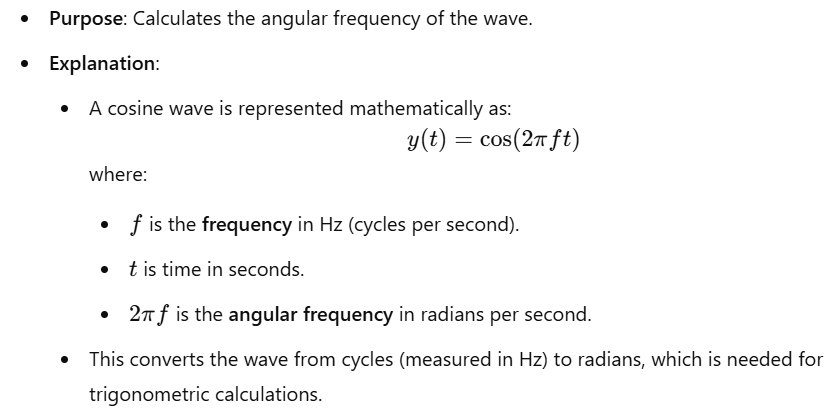

In [53]:
wave_phases = 440 * time_array

In [54]:
wave_phases.shape

(66150,)

In [55]:
wave_phases

array([0.00000000e+00, 9.97747509e-03, 1.99549502e-02, ...,
       6.59980045e+02, 6.59990023e+02, 6.60000000e+02])

### frequency * np.linspace(0, 1.5, 66150)

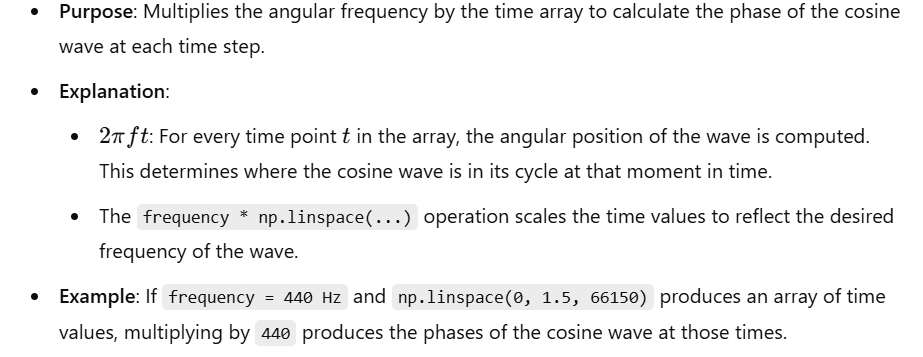

In [56]:
wave_phases

array([0.00000000e+00, 9.97747509e-03, 1.99549502e-02, ...,
       6.59980045e+02, 6.59990023e+02, 6.60000000e+02])

In [57]:
time_array.shape

(66150,)

In [58]:
wave_phases[66149]

660.0

In [59]:
time_arr = np.linspace(0,duration, frames)
print(f"Time Array : {time_arr}, Shape : {time_arr.shape}")
wave_phases_in_freq_Hz_time_arr = 440 * time_arr
print(f"Wave Phases for Time Array in Hz : {wave_phases_in_freq_Hz_time_arr}, Shape : {wave_phases_in_freq_Hz_time_arr.shape}")
wave_phases_in_radians_time_arr = 2 * np.pi * 440 * time_arr
print(f"Wave Phases for Time Array in Radians : {wave_phases_in_radians_time_arr}, Shape : {wave_phases_in_radians_time_arr.shape}")
cos_wave_phases_in_radians_time_arr = np.cos(2 * np.pi * 440 * time_arr)
print(f"Cosine Wave Phases for Time Array in Radians : {cos_wave_phases_in_radians_time_arr}, Shape : {cos_wave_phases_in_radians_time_arr.shape}")

Time Array : [0.00000000e+00 2.26760798e-05 4.53521595e-05 ... 1.49995465e+00
 1.49997732e+00 1.50000000e+00], Shape : (66150,)
Wave Phases for Time Array in Hz : [0.00000000e+00 9.97747509e-03 1.99549502e-02 ... 6.59980045e+02
 6.59990023e+02 6.60000000e+02], Shape : (66150,)
Wave Phases for Time Array in Radians : [0.00000000e+00 6.26903249e-02 1.25380650e-01 ... 4.14677692e+03
 4.14683961e+03 4.14690230e+03], Shape : (66150,)
Cosine Wave Phases for Time Array in Radians : [1.         0.99803561 0.99215014 ... 0.99215014 0.99803561 1.        ], Shape : (66150,)


### np.cos(2 * np.pi * frequency * np.linspace(0,duration, frames))

- Purpose: Applies the cosine function to the computed angular positions to generate the wave.

- Explanation:
    - The cosine function computes the value of the wave at each time step. The result is a NumPy array of amplitude values representing the wave.
    - The values oscillate between -1 and 1, forming the characteristic shape of a cosine wave.

`cos_wave_phases_in_radians_time_arr` is a NumPy array representing the cosine wave in discrete samples. Each element in the array corresponds to the wave's amplitude at a specific time.

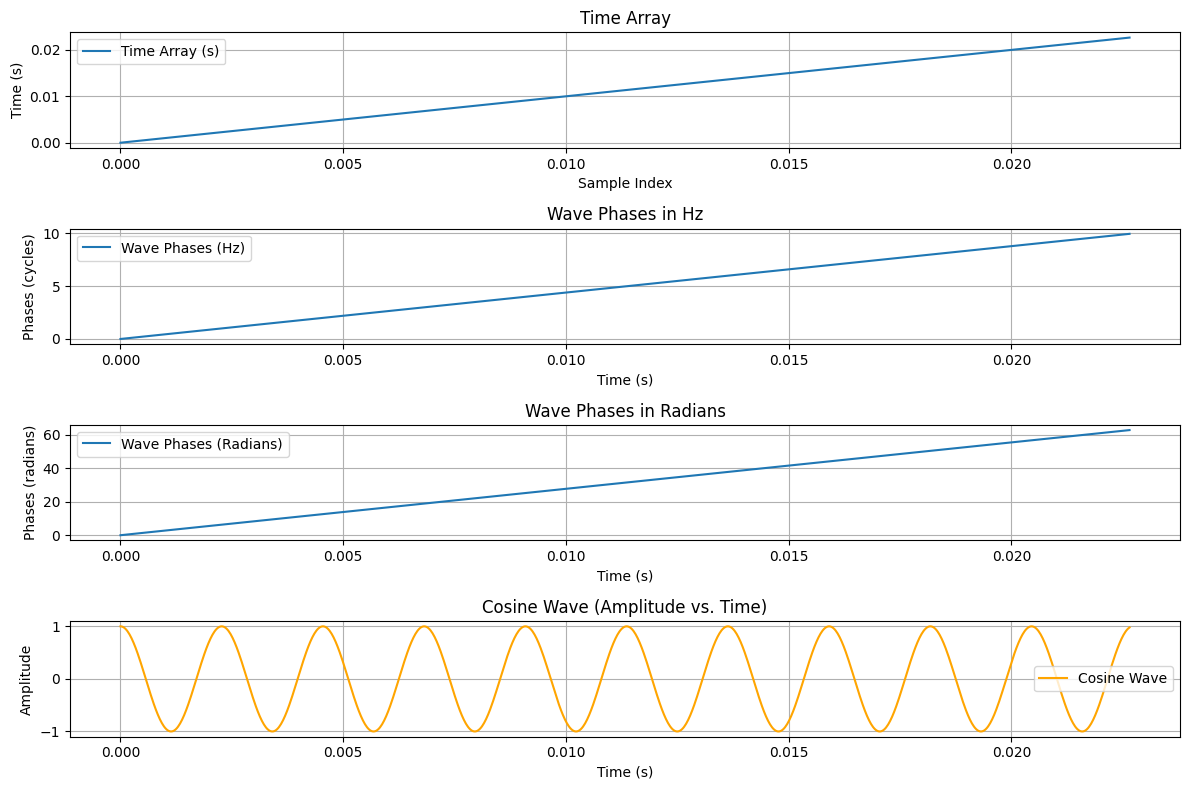

In [60]:
# Parameters
sampling_rate = 44100
frequency = 440
duration = 1.5
frames = int(duration * sampling_rate)

# Arrays
time_arr = np.linspace(0, duration, frames)
wave_phases_in_freq_Hz_time_arr = frequency * time_arr
wave_phases_in_radians_time_arr = 2 * np.pi * frequency * time_arr
cos_wave_phases_in_radians_time_arr = np.cos(2 * np.pi * frequency * time_arr)

# Visualization
plt.figure(figsize=(12, 8))

# Time Array
plt.subplot(4, 1, 1)
plt.plot(time_arr[:1000], time_arr[:1000], label="Time Array (s)")
plt.title("Time Array")
plt.xlabel("Sample Index")
plt.ylabel("Time (s)")
plt.legend()
plt.grid()

# Wave Phases in Hz
plt.subplot(4, 1, 2)
plt.plot(time_arr[:1000], wave_phases_in_freq_Hz_time_arr[:1000], label="Wave Phases (Hz)")
plt.title("Wave Phases in Hz")
plt.xlabel("Time (s)")
plt.ylabel("Phases (cycles)")
plt.legend()
plt.grid()

# Wave Phases in Radians
plt.subplot(4, 1, 3)
plt.plot(time_arr[:1000], wave_phases_in_radians_time_arr[:1000], label="Wave Phases (Radians)")
plt.title("Wave Phases in Radians")
plt.xlabel("Time (s)")
plt.ylabel("Phases (radians)")
plt.legend()
plt.grid()

# Cosine Wave
plt.subplot(4, 1, 4)
plt.plot(time_arr[:1000], cos_wave_phases_in_radians_time_arr[:1000], label="Cosine Wave", color="orange")
plt.title("Cosine Wave (Amplitude vs. Time)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


- The first three plots show how the phase evolves over time, which is useful for understanding the structure of the wave in terms of cycles or radians.
- The cosine wave plot translates those phases into amplitudes, providing a clear picture of the sound wave you are generating.

- time_arr: This represents the linearly spaced time points. A simple plot of this array will show a straight line.
- wave_phases_in_freq_Hz_time_arr: These are the wave phases in cycles (in Hz). The plot will show a linear increase in cycles over time.
- wave_phases_in_radians_time_arr: These are the wave phases in radians. The plot will also show a linear increase, but scaled up by 2𝜋, since radians represent the angular measure.
- cos_wave_phases_in_radians_time_arr: This represents the cosine wave amplitudes. The plot will show an oscillating wave (cosine curve) with a frequency of 440 Hz.

- Time Array (Linear): A straight line indicating time progresses linearly.
- Wave Phases in Hz (Linear): A linearly increasing graph showing the wave's phase in cycles as time progresses.
- Wave Phases in Radians (Linear): Another linearly increasing graph, but the slope is scaled by 2π, as radians represent angular cycles.
- Cosine Wave (Oscillating): A cosine wave oscillating between -1 and 1, representing the actual wave amplitude at each time point.

In [61]:
cos_wave_time_arr = np.cos(2*np.pi*frequency*np.linspace(0,duration, frames))

In [62]:
cos_wave_time_arr

array([1.        , 0.99803561, 0.99215014, ..., 0.99215014, 0.99803561,
       1.        ])

In [63]:
cos_wave_time_arr.shape

(66150,)

In [64]:
cos_wave_time_arr[66149]

1.0

### Cosine wave oscillating at 440 Hz for the specified duration

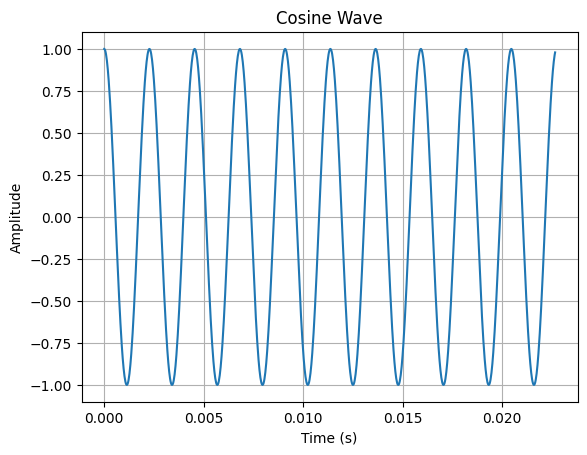

In [65]:
time_arr = np.linspace(0, duration, frames)  # Time array
cos_wave = np.cos(2 * np.pi * frequency * time_arr)  # Cosine wave

plt.plot(time_arr[:1000], cos_wave[:1000])  # Plot the first 1000 samples
plt.title("Cosine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [66]:
sound = np.asarray([32767*cos_wave, 32767*cos_wave])

In [67]:
sound

array([[32767.        , 32702.63267098, 32509.78356964, ...,
        32509.78356964, 32702.63267098, 32767.        ],
       [32767.        , 32702.63267098, 32509.78356964, ...,
        32509.78356964, 32702.63267098, 32767.        ]])

In [68]:
sound.shape

(2, 66150)

- cos_wave is likely a NumPy array representing a cosine wave.
- A cosine wave is a mathematical waveform that oscillates in a sinusoidal shape. In audio processing, cosine waves are commonly used to generate sound signals.
- 32767 is the maximum positive value for a 16-bit signed integer, which is a standard format for representing audio samples in digital audio processing.
- By multiplying cos_wave by 32767, the code scales the cosine wave's values to the full range of a 16-bit audio signal. This ensures the wave is loud and fully utilizes the 16-bit resolution.

### np.asarray([32767*cos_wave, 32767*cos_wave])

- The np.asarray() function creates a NumPy array from the provided list.
- The input to np.asarray() is a list containing two identical elements: [32767*cos_wave, 32767*cos_wave].
- 32767*cos_wave is a NumPy array, so the resulting array sound will have two rows:
    - The first row contains the scaled cosine wave (32767*cos_wave).
    - The second row contains an identical copy of the same wave.
- This structure makes sound a 2D NumPy array with a shape of (2, N), where N is the number of samples in cos_wave.

### Why duplicate the wave?
- In audio processing, a stereo signal has two channels: left and right.
- By duplicating the wave, the code creates a stereo sound where both channels (left and right) have the same signal, resulting in a mono sound being played through both speakers equally.

![Screenshot 2025-01-02 121105.png](<attachment:Screenshot 2025-01-02 121105.png>)
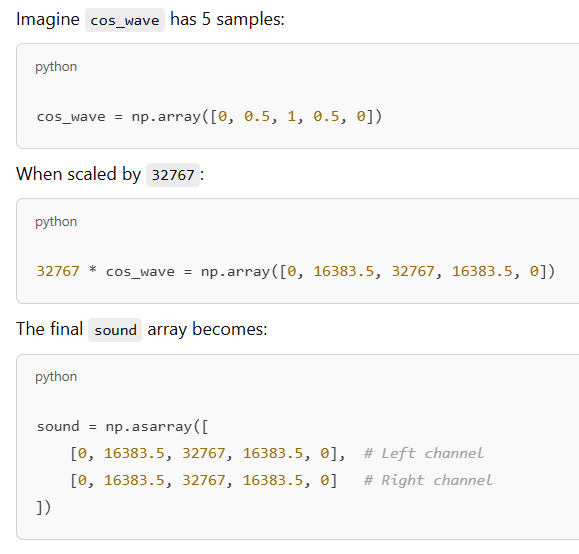

- This prepares a stereo sound signal for playback or further processing.
- The generated sound can be passed to an audio library (like scipy.io.wavfile or pydub) to save it as a WAV file or play it.

### Structure of np.asarray([32767*cos_wave, 32767*cos_wave])
- The input to np.asarray() is a list of two elements:[32767*cos_wave, 32767*cos_wave]
- Each element in this list (32767*cos_wave) is itself a 1D NumPy array with a length of N, where N is the number of samples in the cos_wave array.
- Since the two elements in the list are identical and have the same shape ((N,)), np.asarray() stacks them along a new dimension (row-wise by default) to create a 2D NumPy array.

### Shape Explanation : 
When np.asarray() processes the input, It combines the two 1D arrays into a single 2D array, where:

- Each row corresponds to one of the input arrays (32767*cos_wave).
- The number of rows is 2 (one for each element in the list).
- The number of columns in each row is the length of cos_wave, which is N.
- The resulting array has a shape of (2, N):

### 2 rows: One for each copy of 32767*cos_wave.
- N columns: Each column corresponds to a sample in the cos_wave.

### Why (2, N)?
This shape reflects the stereo sound structure, where:
- Row 1 (sound[0, :]) represents the left audio channel.
- Row 2 (sound[1, :]) represents the right audio channel.
Both rows contain N samples, corresponding to the same time points.


In [69]:
type(sound)

numpy.ndarray

In [70]:
type(sound[0][0])

numpy.float64

In [71]:
sound = sound.T

![Screenshot 2025-01-02 123221.png](<attachment:Screenshot 2025-01-02 123221.png>)
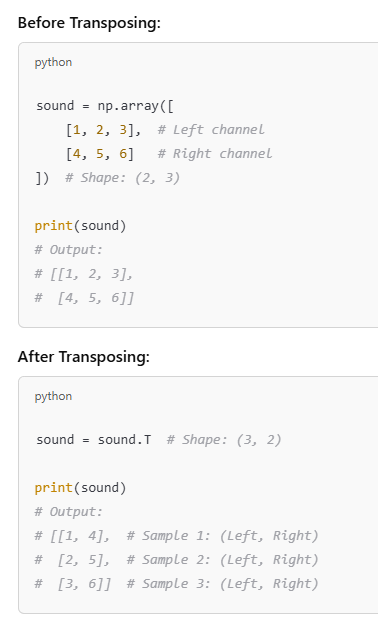

 - sound = sound.T rearranges the sound array from a shape of (2, N) (2 rows: Left and Right channels) to (N, 2) (N rows: each row representing a sample with Left and Right channel values). This format is commonly used for stereo audio processing and playback.

### What does .T do?
- .T is a property of a NumPy array that transposes it.
- Transposing an array swaps its rows and columns. For a 2D array with shape (m, n):
- After transposition, the shape becomes (n, m).
- Rows become columns, and columns become rows.

### Original Shape of sound (Before transposing):
- sound has a shape of (2, N):
- 2 rows (one for the left channel, one for the right channel).
- N columns (one for each sample in the wave).

### Transposed Shape (After applying sound.T):

- The shape becomes (N, 2):
- N rows (one for each sample).
- 2 columns (one for the left channel, one for the right channel).

### Why Transpose the Array?

- In audio processing, the transposed format (N, 2) is often required because:

- Playback or Export: Libraries like scipy.io.wavfile.write expect audio data for stereo signals to be in the format (N, 2), where each row represents a sample, and each column represents a channel (Left, Right).
This matches how stereo audio is stored in standard file formats.

- Data Structure Convenience: The transposed structure allows easier iteration over time samples (rows), with each row containing the left and right channel values for that sample.

In [72]:
sound.shape

(66150, 2)

In [73]:
type(sound[0][0])

numpy.float64

In [74]:
sound = sound.astype(np.int16)

### What does .astype(np.int16) do?
- The .astype() method in NumPy converts an array from its current data type to another specified data type.
- Here, np.int16 means 16-bit signed integers, which can store values in the range:
    - -32,768 to +32,767
- This operation changes how the data is stored in memory, ensuring that all values in the sound array fit within this range.

### Why convert to np.int16?
- Digital audio is typically stored and processed in the 16-bit PCM (Pulse Code Modulation) format. 
- This format is a standard for audio data in WAV files and playback systems. Converting to np.int16 ensures compatibility with these systems.

### What happens during the conversion? Scaling/Clipping:
- If the sound array contains floating-point numbers (e.g., float32), converting to int16 will truncate the decimal part.
- Any values outside the range of -32,768 to 32,767 will be clipped (e.g., a value of 40,000 will be set to 32,767).

### Why is this step important? This step is necessary because:

- Audio Standards: Many audio libraries (like scipy.io.wavfile.write) and hardware systems require audio data in the int16 format for playback or saving.
- Memory Efficiency: Converting to int16 reduces memory usage compared to floating-point formats like float32 or float64.
- Compatibility with Audio Hardware: Most audio devices process 16-bit PCM data, so this step ensures the sound array can be played or saved correctly.

In [75]:
sound = pg.sndarray.make_sound(sound.copy())

### What does pg.sndarray.make_sound() do?
- pg.sndarray.make_sound(array): Converts a NumPy array (array) into a Pygame Sound object (pygame.mixer.Sound).
- This allows the sound data stored in the NumPy array to be played using Pygame’s audio playback functions, such as play().

### Why use sound.copy()?
- Pygame's make_sound() requires a copy of the NumPy array to ensure the data is contiguous and in a proper format.
- If the original array is a view or has specific memory layouts that aren’t compatible with Pygame, this can cause issues during playback.
- Using sound.copy() ensures that: A completely new array is created in memory and The data is in the required layout for Pygame (e.g., contiguous in memory).

### Requirements for sound
The sound array passed to pg.sndarray.make_sound() must follow certain requirements:

- Shape:

    - For mono audio: Shape should be (N,), where N is the number of samples.
    - For stereo audio: Shape should be (N, 2), where N is the number of samples, and 2 represents the left and right audio channels.

- Data Type: The array must be of type np.int16 (16-bit PCM audio) or np.uint8 (8-bit audio).

In [77]:
sound.play()

## Relationship Between Musical Notes

### The Musical Scale
- A musical scale is a set of notes arranged in ascending or descending order by pitch.
- The most common scale is the Western chromatic scale, which has 12 notes: C, C#, D, D#, E, F, F#, G, G#, A, A#, B
- The "#" symbol (called sharp) means the pitch is slightly higher.
- Each note is a semitone (smallest step) apart from the next.

### Octaves
- An octave is the interval between one note and the next note with double the frequency.
- Example: If a note has a frequency of 440 Hz (A4), the same note one octave higher (A5) will have a frequency of 880 Hz.

### Relationship Between Notes
- In Western music, the frequency of any two consecutive notes in the chromatic scale is related by a constant factor.
- This constant factor is derived from the 12th root of 2.

### What is the 12th Root of 2?

![Screenshot 2025-01-02 125833.png](<attachment:Screenshot 2025-01-02 125833.png>)

This number is used because:

- In an octave, the frequency doubles (e.g., A4 = 440 Hz, A5 = 880 Hz).
- The octave is divided into 12 equal parts (the 12 notes in the chromatic scale).
- To calculate the frequency difference between consecutive notes, we multiply the previous note’s frequency by the 12th root of 2.

![Screenshot 2025-01-02 125931.png](<attachment:Screenshot 2025-01-02 125931.png>)

### Why the 12th Root of 2 is Important

- Equal Temperament Tuning:

    - The 12th root of 2 ensures that the notes are spaced equally in pitch.
    - This makes music sound harmonious in all keys (scales).

- Universal Music System:

    - This system is used in modern music worldwide, making it possible to play instruments together, regardless of their type.

### Easy Analogy
- Think of an octave like climbing a ladder, where:

    - Each step (semitone) is a little higher than the previous one.
    - The height difference between each step is always the same (this "height" difference is the 12th root of 2 in terms of frequency).
    - After 12 steps, you’ve doubled your height (frequency), and you’re at the next octave.

![Screenshot 2025-01-02 130144.png](<attachment:Screenshot 2025-01-02 130144.png>)

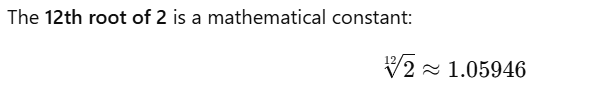
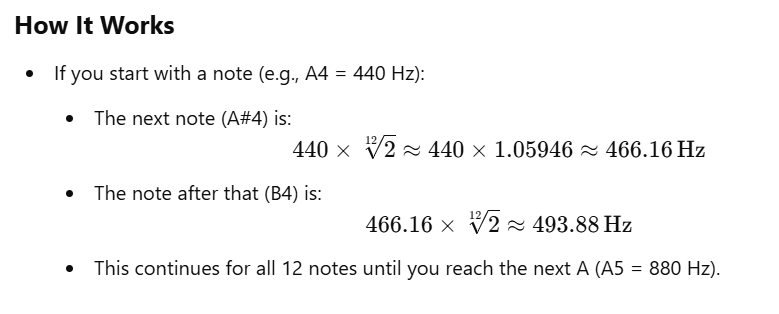
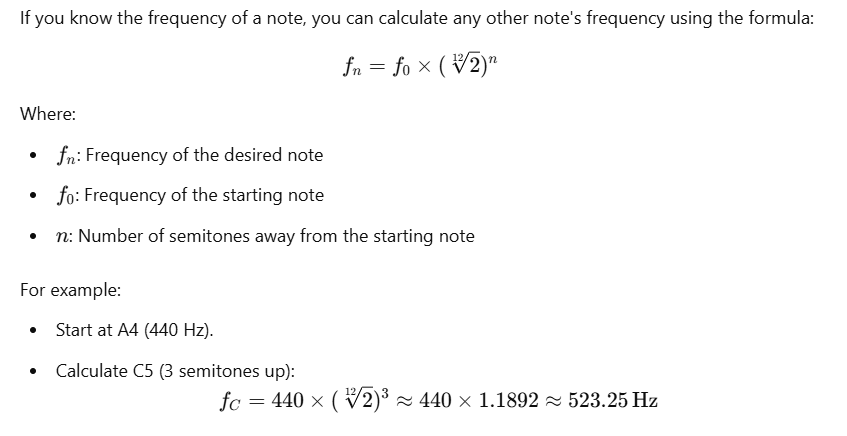

### To produce all the musical notes we just need the duration between consecutive notes which is `12th Root of 2` and a `list of all the notes` along with the `frequency of the first note`.

### Function to create sound from frequency, duration and sampling rate

In [125]:
def synth(frequency, duration=1.5, sampling_rate=44100):
    frames = int(duration*sampling_rate)
    arr = np.cos(2*np.pi*frequency*np.linspace(0,duration, frames))
    sound = np.asarray([32767*arr,32767*arr]).T.astype(np.int16)
    sound = pg.sndarray.make_sound(sound.copy())
    return sound

### Loading the text file containing the names of all the notes

In [126]:
notes_file = open(r"C:\Users\OMOLP094\Desktop\My_GitHub_Repos\Wavetable-Synthesis-with-Python\sound_synthesizer_with_pygame_and_numpy\noteslist.txt")

In [127]:
file_contents = notes_file.read()

In [128]:
file_contents

'C0\nC#0\nD0\nD#0\nE0\nF0\nF#0\nG0\nG#0\nA0\nA#0\nB0\nC1\nC#1\nD1\nD#1\nE1\nF1\nF#1\nG1\nG#1\nA1\nA#1\nB1\nC2\nC#2\nD2\nD#2\nE2\nF2\nF#2\nG2\nG#2\nA2\nA#2\nB2\nC3\nC#3\nD3\nD#3\nE3\nF3\nF#3\nG3\nG#3\nA3\nA#3\nB3\nC4\nC#4\nD4\nD#4\nE4\nF4\nF#4\nG4\nG#4\nA4\nA#4\nB4\nC5\nC#5\nD5\nD#5\nE5\nF5\nF#5\nG5\nG#5\nA5\nA#5\nB5\nC6\nC#6\nD6\nD#6\nE6\nF6\nF#6\nG6\nG#6\nA6\nA#6\nB6\nC7\nC#7\nD7\nD#7\nE7\nF7\nF#7\nG7\nG#7\nA7\nA#7\nB7\nC8\nC#8\nD8\nD#8\nE8\nF8\nF#8\nG8\nG#8\nA8\nA#8\nB8\n'

In [129]:
notes_file.close()

In [145]:
noteslist = file_contents.splitlines() # .splitlines(): This is a built-in method in Python for strings that splits the string into a list of lines. It breaks the string wherever there is a newline character (\n), and each line in the string becomes an element in the resulting list.

In [131]:
noteslist

['C0',
 'C#0',
 'D0',
 'D#0',
 'E0',
 'F0',
 'F#0',
 'G0',
 'G#0',
 'A0',
 'A#0',
 'B0',
 'C1',
 'C#1',
 'D1',
 'D#1',
 'E1',
 'F1',
 'F#1',
 'G1',
 'G#1',
 'A1',
 'A#1',
 'B1',
 'C2',
 'C#2',
 'D2',
 'D#2',
 'E2',
 'F2',
 'F#2',
 'G2',
 'G#2',
 'A2',
 'A#2',
 'B2',
 'C3',
 'C#3',
 'D3',
 'D#3',
 'E3',
 'F3',
 'F#3',
 'G3',
 'G#3',
 'A3',
 'A#3',
 'B3',
 'C4',
 'C#4',
 'D4',
 'D#4',
 'E4',
 'F4',
 'F#4',
 'G4',
 'G#4',
 'A4',
 'A#4',
 'B4',
 'C5',
 'C#5',
 'D5',
 'D#5',
 'E5',
 'F5',
 'F#5',
 'G5',
 'G#5',
 'A5',
 'A#5',
 'B5',
 'C6',
 'C#6',
 'D6',
 'D#6',
 'E6',
 'F6',
 'F#6',
 'G6',
 'G#6',
 'A6',
 'A#6',
 'B6',
 'C7',
 'C#7',
 'D7',
 'D#7',
 'E7',
 'F7',
 'F#7',
 'G7',
 'G#7',
 'A7',
 'A#7',
 'B7',
 'C8',
 'C#8',
 'D8',
 'D#8',
 'E8',
 'F8',
 'F#8',
 'G8',
 'G#8',
 'A8',
 'A#8',
 'B8']

In [132]:
len(noteslist)

108

### Frequency of the first note C0

- In the scientific pitch notation, each note has a corresponding frequency. The note 16.3516 Hz corresponds to C0 (C in the 0th octave) in this system. This is the lowest C note on a standard piano and serves as the fundamental pitch for the C series of notes.

- C0 has a frequency of approximately 16.3516 Hz.

![Screenshot 2025-01-02 153530.png](<attachment:Screenshot 2025-01-02 153530.png>)
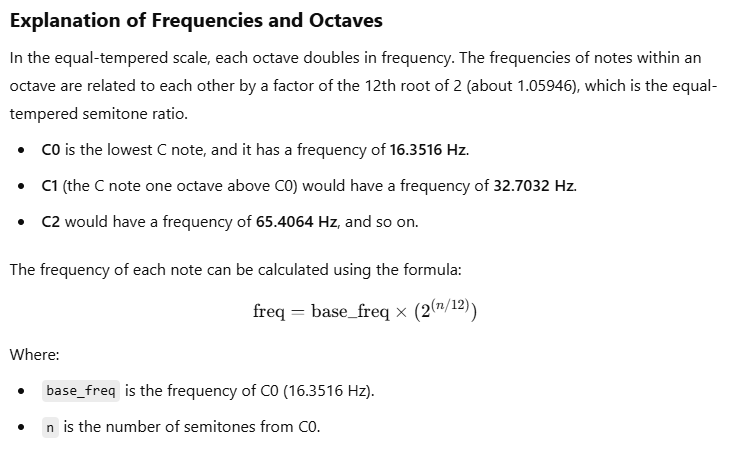

In [133]:
freq = 16.3516 # start frequency (frequency of the first note from the noteslist text file)

In [138]:
noteslist[107]

'B8'

### Generating sound of all musical notes from C0 to B8 (12 Octaves)

- The human ear is less sensitive to lower frequencies, especially below 50 Hz. C0 has a frequency of 16.35 Hz, which is too low for many people to perceive as a distinct pitch.
- Instead of sounding like a bass note, low frequencies often feel more like vibrations or a "rumble" rather than a musical tone.
- Most consumer-grade speakers and headphones are not designed to reproduce very low frequencies (sub-bass). 
- For example:
    - Many speakers cut off frequencies below 50–100 Hz.
    - If you're using laptop speakers, they will almost certainly not produce low-frequency sounds like C0 correctly.

In [150]:
# Initialize the mixer module in Pygame, which is responsible for playing sounds and managing audio.
pg.mixer.init()
for i in range(len(noteslist)):
    # Get the name of the current note.
    note_name = noteslist[i]
    print(f"Playing note: {note_name}")  # Print the note name to the console
    sound = synth(freq)
    # Set the volume of the sound to 50% (scale is from 0.0 to 1.0).
    sound.set_volume(0.50)
    # Play the generated sound immediately.
    sound.play()
    # Apply a fade-out effect to the sound over 100 milliseconds.
    sound.fadeout(500)
    # Wait for 1000 milliseconds before moving on to the next note/sound.
    pg.time.wait(1000)
    # Update the frequency for the next note. This increases the frequency by a semitone (12th root of 2).
    # This essentially simulates the equal-tempered scale where each step is one semitone.
    freq = freq * 2 ** (1/12)

pg.mixer.quit()
    

Playing note: C0
Playing note: C#0
Playing note: D0
Playing note: D#0
Playing note: E0
Playing note: F0
Playing note: F#0
Playing note: G0
Playing note: G#0
Playing note: A0
Playing note: A#0
Playing note: B0
Playing note: C1
Playing note: C#1
Playing note: D1
Playing note: D#1
Playing note: E1
Playing note: F1
Playing note: F#1
Playing note: G1
Playing note: G#1
Playing note: A1
Playing note: A#1
Playing note: B1
Playing note: C2
Playing note: C#2
Playing note: D2
Playing note: D#2
Playing note: E2
Playing note: F2
Playing note: F#2
Playing note: G2
Playing note: G#2
Playing note: A2
Playing note: A#2
Playing note: B2
Playing note: C3
Playing note: C#3
Playing note: D3
Playing note: D#3
Playing note: E3
Playing note: F3
Playing note: F#3
Playing note: G3
Playing note: G#3
Playing note: A3
Playing note: A#3
Playing note: B3
Playing note: C4
Playing note: C#4
Playing note: D4
Playing note: D#4
Playing note: E4
Playing note: F4
Playing note: F#4
Playing note: G4
Playing note: G#4
Playing

### Combining the audio of all musical notes and saving the combined audio as a wave file 

In [152]:
pg.mixer.init()
from scipy.io.wavfile import write

combined_audio = []  # List to store audio data of all notes

# Generate and play each note
for i in range(len(noteslist)):
    # Get the name of the current note
    note_name = noteslist[i]
    print(f"Playing note: {note_name}")  # Print the note name to the console
    
    # Generate sound for the current note
    sound = synth(freq, duration=1.0, sampling_rate=sampling_rate)
    combined_audio.append(sound)  # Add the audio data to the combined list
    
    # Play the generated sound (for real-time playback)
    pg_sound = pg.sndarray.make_sound(sound)
    pg_sound.set_volume(0.50)  # Set volume to 50%
    pg_sound.play()
    pg_sound.fadeout(500)  # Fade-out over 500 ms
    pg.time.wait(1000)  # Wait 1 second before the next note
    
    # Update the frequency for the next note (equal-tempered scale)
    freq = freq * 2 ** (1/12)

# Combine all the notes into a single audio array
combined_audio = np.vstack(combined_audio)  # Stack all audio vertically

# Save the combined audio to a file
write(r"C:\Users\OMOLP094\Desktop\My_GitHub_Repos\Wavetable-Synthesis-with-Python\sound_synthesizer_with_pygame_and_numpy\Jupyter_Notebook_Notes\combined_notes.wav", sampling_rate, combined_audio)

# Quit Pygame mixer
pg.mixer.quit()

print("Audio file 'combined_notes.wav' has been created.")

Playing note: C0
Playing note: C#0
Playing note: D0
Playing note: D#0
Playing note: E0
Playing note: F0
Playing note: F#0
Playing note: G0
Playing note: G#0
Playing note: A0
Playing note: A#0
Playing note: B0
Playing note: C1
Playing note: C#1
Playing note: D1
Playing note: D#1
Playing note: E1
Playing note: F1
Playing note: F#1
Playing note: G1
Playing note: G#1
Playing note: A1
Playing note: A#1
Playing note: B1
Playing note: C2
Playing note: C#2
Playing note: D2
Playing note: D#2
Playing note: E2
Playing note: F2
Playing note: F#2
Playing note: G2
Playing note: G#2
Playing note: A2
Playing note: A#2
Playing note: B2
Playing note: C3
Playing note: C#3
Playing note: D3
Playing note: D#3
Playing note: E3
Playing note: F3
Playing note: F#3
Playing note: G3
Playing note: G#3
Playing note: A3
Playing note: A#3
Playing note: B3
Playing note: C4
Playing note: C#4
Playing note: D4
Playing note: D#4
Playing note: E4
Playing note: F4
Playing note: F#4
Playing note: G4
Playing note: G#4
Playing

### How vstack Works in This Case:
- Suppose we have two notes:
    - Note 1: Shape (44100, 2) (1 second of stereo sound at 44.1 kHz).
    - Note 2: Shape (44100, 2).

- After np.vstack:
    - Combined Shape: (88200, 2) (2 seconds of stereo sound, one note after the other).

- Each note is represented as a 2D NumPy array of shape (frames, 2):
    - frames: Number of samples for the note.
    - 2: Two channels for stereo audio.

- To combine these notes into a single array representing a continuous audio track, they need to be stacked vertically (i.e., one note after another in time).

<hr><hr>

### Code to Understand

Audio Duration: 108.0 seconds
Second 1: 1519.00 Hz
Second 2: 12367.00 Hz
Second 3: 12892.00 Hz
Second 4: 5411.00 Hz
Second 5: 9110.00 Hz
Second 6: 14032.00 Hz
Second 7: 14571.00 Hz
Second 8: 4107.00 Hz
Second 9: 4427.00 Hz
Second 10: 18014.00 Hz
Second 11: 21748.00 Hz
Second 12: 10718.00 Hz
Second 13: 5488.00 Hz
Second 14: 19367.00 Hz
Second 15: 18315.00 Hz
Second 16: 10821.00 Hz
Second 17: 18221.00 Hz
Second 18: 16037.00 Hz
Second 19: 14957.00 Hz
Second 20: 8213.00 Hz
Second 21: 8854.00 Hz
Second 22: 8070.00 Hz
Second 23: 12683.00 Hz
Second 24: 5339.00 Hz
Second 25: 9750.00 Hz
Second 26: 6083.00 Hz
Second 27: 14863.00 Hz
Second 28: 9817.00 Hz
Second 29: 14310.00 Hz
Second 30: 10515.00 Hz
Second 31: 2053.00 Hz
Second 32: 2115.00 Hz
Second 33: 17426.00 Hz
Second 34: 20977.00 Hz
Second 35: 18734.00 Hz
Second 36: 10678.00 Hz
Second 37: 19499.00 Hz
Second 38: 12167.00 Hz
Second 39: 14374.00 Hz
Second 40: 19634.00 Hz
Second 41: 15479.00 Hz
Second 42: 21029.00 Hz
Second 43: 4106.00 Hz
Second

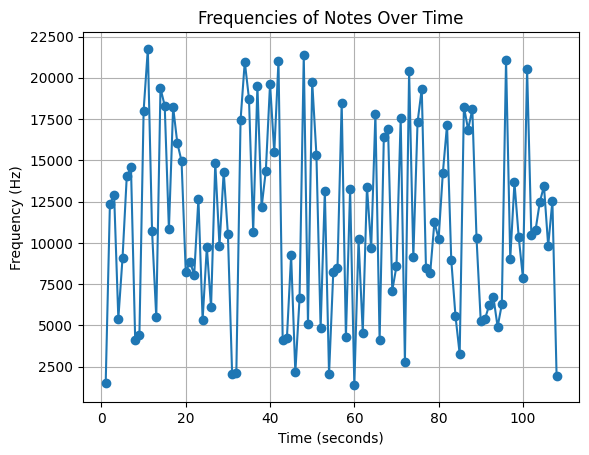

In [153]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Step 1: Load the audio file
audio_file = r"C:\Users\OMOLP094\Desktop\My_GitHub_Repos\Wavetable-Synthesis-with-Python\sound_synthesizer_with_pygame_and_numpy\Jupyter_Notebook_Notes\combined_notes.wav"
sampling_rate, data = wavfile.read(audio_file)

# Step 2: Handle stereo audio (convert to mono if needed)
if len(data.shape) == 2:  # If stereo, average the two channels
    data = np.mean(data, axis=1)

# Step 3: Calculate the number of samples per 1-second chunk
samples_per_second = sampling_rate
total_duration = len(data) / sampling_rate  # In seconds
print(f"Audio Duration: {total_duration} seconds")

# Step 4: Loop through 1-second segments and perform FFT
frequencies = []
for i in range(0, len(data), samples_per_second):
    # Extract 1-second chunk
    segment = data[i:i + samples_per_second]

    # Perform FFT on the segment
    fft_result = np.fft.fft(segment)
    fft_frequencies = np.fft.fftfreq(len(segment), d=1/sampling_rate)

    # Get the magnitude of the FFT and find the peak frequency
    magnitude = np.abs(fft_result)
    peak_frequency = fft_frequencies[np.argmax(magnitude[:len(magnitude)//2])]  # Positive frequencies only

    frequencies.append(peak_frequency)

    # Print the frequency for each second
    print(f"Second {i // samples_per_second + 1}: {peak_frequency:.2f} Hz")

# Step 5: Plot the frequencies
plt.plot(range(1, len(frequencies) + 1), frequencies, marker='o')
plt.title("Frequencies of Notes Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.grid()
plt.show()


In [101]:
notes = [] # dict to store samples
freq = 16.3516 # start frequency (frequency of the first note from the noteslist text file)

In [141]:
keylist = '123456789qwertyuioasdfghjklzxcvbnm,.'
keymod = '0-='
notes = {} # dict to store samples
freq = 16.3516 # start frequency (frequency of the first note from the noteslist text file)

In [142]:
for i in range(len(noteslist)):
    mod = int(i/36)
    key = keylist[i-mod*36]+str(mod) 
    sample = synth(freq)
    notes[key] = [sample, noteslist[i], freq]
    notes[key][0].set_volume(0.33)
    notes[key][0].play()
    notes[key][0].fadeout(100)
    pg.time.wait(100)
    freq = freq * 2 ** (1/12)
pg.mixer.quit()
pg.quit()